# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

## Read the datasets

In [1]:
import pandas as pd

In [2]:
df_target =  pd.read_csv("power_consumption_g3.csv")
df_features = pd.read_csv("power_consumption_g3_feat.csv")

## Merge the datasets (and pre-processing if needed)

In [3]:
df_target.head()

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766


In [4]:
df_features.head()

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900


In [5]:
df_features["Date"] = pd.to_datetime(df_features["Date"])
df_features.set_index(keys=["Date"],inplace=True)
df_features.sort_index(inplace=True)
df_features

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [6]:
df_target["Date"] = pd.to_datetime(df_target["Date"])
df_target.set_index(keys=["Date"],inplace=True)
df_target.sort_index(inplace=True)
df_target

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [7]:
df = pd.merge(left=df_features,right=df_target,left_index=True,right_index=True)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [8]:
df.isna().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [9]:
features = ["Temperature","Humidity","WindSpeed","GeneralDiffuseFlows","DiffuseFlows"]
target = "SolarPower"


In [10]:
for f in features:
    df[f]=df[f].interpolate(method="linear")

In [11]:
df.isna().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

## Group the datasets into time intervals of 2 hours

In [12]:
df = df.groupby(pd.Grouper(freq="2h")).mean()
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005


In [13]:
import seaborn as sns

<Axes: >

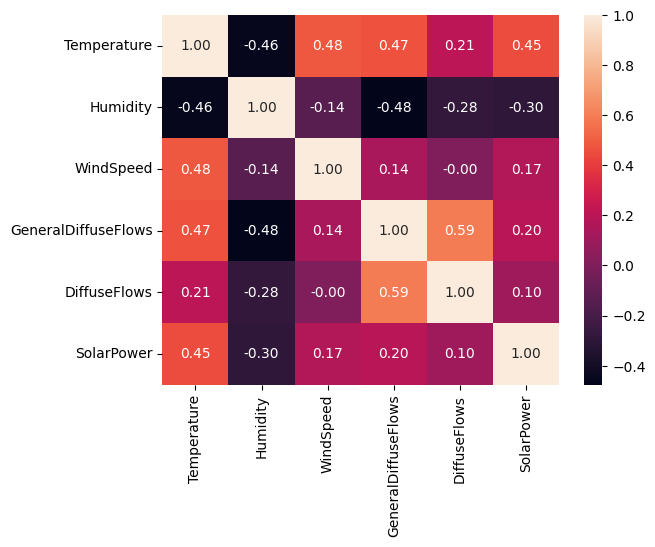

In [14]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

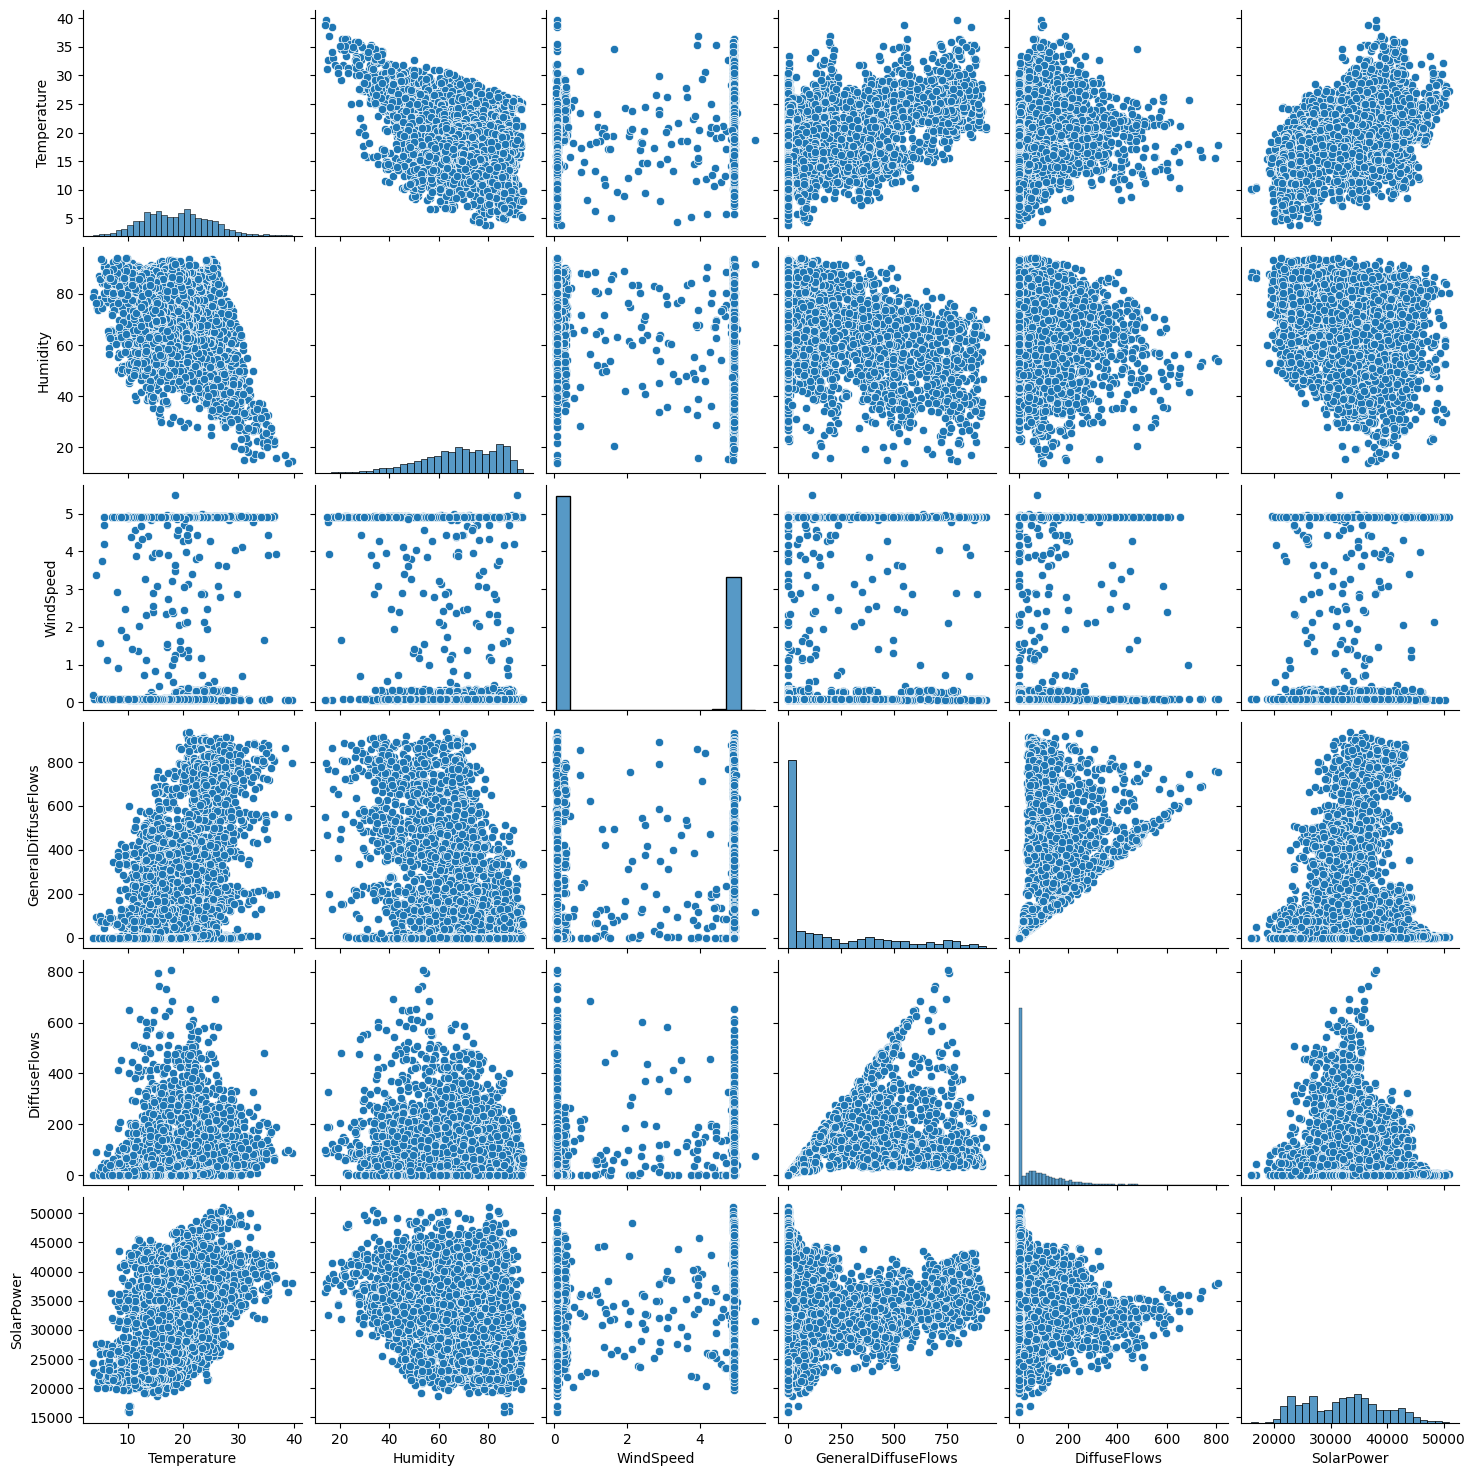

In [15]:
sns.pairplot(df)

## Create lags

In [16]:
lags = range(4,0,-1)
list(lags)

[4, 3, 2, 1]

In [17]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.866833,76.300000,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606,11.221667,48.974583,0.078417,0.062917,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386,11.082500,48.224167,0.078083,76.933417,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005,13.382500,43.325000,0.077000,353.441667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [18]:
df.drop(columns=features,inplace=True)
df.dropna(axis=0, inplace=True)

In [19]:
df

,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,DiffuseFlows_4,SolarPower_4,Temperature_3,Humidity_3,WindSpeed_3,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,21255.189872,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,27986.835442,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,30060.759495,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442
2017-01-01 14:00:00,29558.481012,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,...,2.913333,350.887500,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,31576.708860,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,29293.789606,11.221667,48.974583,0.078417,0.062917,0.112750,21307.984791,11.082500,48.224167,0.078083,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,31262.864386,11.082500,48.224167,0.078083,76.933417,16.887500,23720.152091,13.382500,43.325000,0.077000,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,37721.673005,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


# Split the dataset into 80% training and 20% testing datasets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X,y=df.drop(columns=[target]),df[target]

In [23]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.transform(test_X)

In [26]:
lag = 4
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(3491, 4, 6)

In [28]:
from xgboost import XGBRegressor

In [29]:
regressor = XGBRegressor(n_estimators=30).fit(train_X,train_y)

In [31]:
pred_y=regressor.predict(test_X)

In [52]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)

In [54]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 1367.372112693299
MAPE: 0.04648112725858316
MSE: 3400804.193325497
RMSE: 1844.1269460982064
R2 Score: 0.9049127192264712


## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [40]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [41]:
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [20, 30, 40, 50, 60, 70],
        "max_depth": [2, 3, 4, 5, 6, 7]
    },
    cv=TimeSeriesSplit(n_splits=5)
)

In [42]:
grid_search.fit(train_X, train_y)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'max_depth': [2, 3, ...], 'n_estimators': [20, 30, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [43]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 40}

## Fit the model with the best parameters on the training dataset

In [44]:
regressor = XGBRegressor(n_estimators=40, max_depth=6).fit(train_X, train_y)

In [45]:
pred_y=regressor.predict(test_X)

## Calculate the adequate metrics on the testing dataset

In [53]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 1367.372112693299
MAPE: 0.04648112725858316
MSE: 3400804.193325497
RMSE: 1844.1269460982064
R2 Score: 0.9049127192264712


## Visualize the targets against the predictions

<Axes: xlabel='Date'>

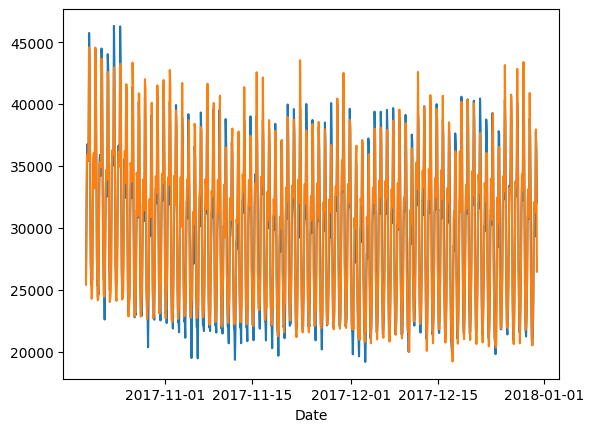

In [55]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y)